### Task
- Create a script that does the Follwing:

1. Detect the Intnet of Message (question,feedback , help.compilant)
2. Give an appopirate response

In [6]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage
from dotenv import load_dotenv

load_dotenv()


True

In [7]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-2.5-pro", temperature=0)

In [8]:
from dotenv import load_dotenv
from langchain.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from IPython.display import Image, display

from langgraph.graph import StateGraph , START , END , MessageGraph 
from langchain_core.messages import HumanMessage , AIMessage , SystemMessage
from typing import TypedDict

In [9]:
model.invoke("Hello, how are you?")

AIMessage(content="Hello! Thanks for asking. As an AI, I don't have feelings, but I'm functioning perfectly and I'm ready to help.\n\nHow can I assist you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-pro', 'safety_ratings': []}, id='run--1894252a-192e-4ba2-8cc9-62e86c1a5b14-0', usage_metadata={'input_tokens': 7, 'output_tokens': 1352, 'total_tokens': 1359, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 1313}})

In [10]:
# define the state
from typing import Annotated
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages:Annotated[list,add_messages]
    feedback:Annotated[list, add_messages]
    help:Annotated[list, add_messages]
    complaint:Annotated[list, add_messages]

In [11]:
def query_function(state:State):
    """
    This function will classify the sentiment of the message
    """
    user_input = state["messages"][0].content
    prompt = f"""
    You are the Expert AI Assitant, how will take the user input and answer to his question,
    before answering to the question , you need to understnad the question througly and give the feedback and give reply of that particluar message needed help 
    and take down compilaint if the user had given , and also you need to be smart and reply it politely. 
    """
    final_message = user_input + prompt
    response = model.invoke(final_message).content
    return {"messages": [response]}


In [12]:
def feedback_function(state:State):
    """
    This function will classify the sentiment of the message
    """
    user_input = state["messages"][0].content
    prompt = f"""
    You are the Expert AI Assitant, Understnad the User topic and give the feedback to the user and also you need to be smart and reply it politely. 
    """
    final_message = user_input + prompt
    response = model.invoke(final_message).content
    return {"messages": [response]}


In [13]:
def complaint_function(state:State):
    """
    This function will classify the sentiment of the message
    """
    user_input = state["messages"][0].content
    prompt = f"""
  You are the Expert in Understnading user Complaint , Understnad the User topic and 
  note his compliant and give reply with politely and give the suggestion
    """
    final_message = user_input + prompt
    response = model.invoke(final_message).content
    return {"messages": [response]}


In [14]:
workflow = StateGraph(State)
workflow.add_node("User Query" , query_function)
workflow.add_node("Take Compliant" , complaint_function)
workflow.add_node("Feedback" ,feedback_function)
workflow.add_edge(START , "User Query")
workflow.add_edge("User Query" , "Take Compliant")
workflow.add_edge("Take Compliant" , "Feedback")
workflow.add_edge("Feedback" , END)
app = workflow.compile()

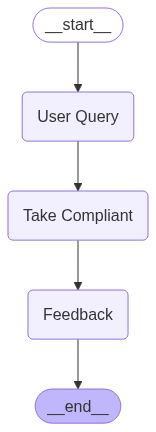

In [15]:
app 